### Creates a correlation matrix
We should probably remove or combine some features

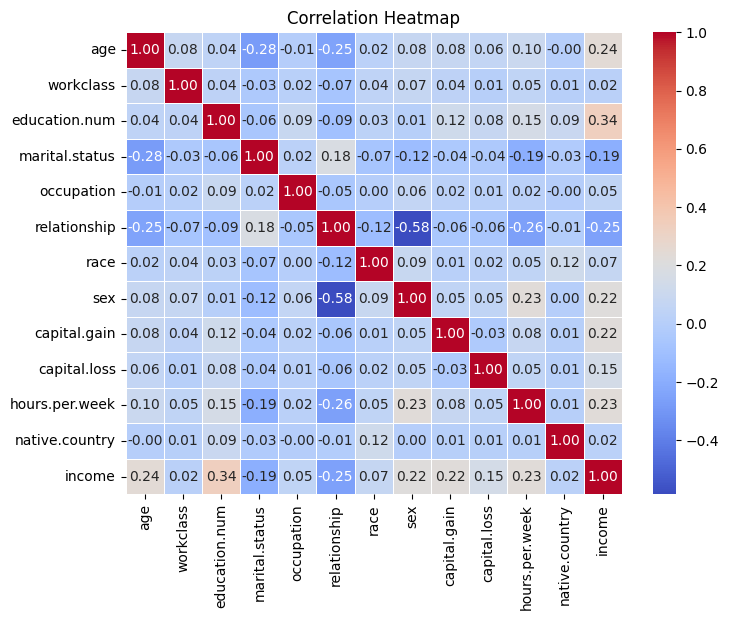

age  workclass  education.num  marital.status  occupation  relationship  \
1    82          2              9               6           3             1   
3    54          2              4               0           6             4   
4    41          2             10               5           9             3   
5    34          2              9               0           7             4   
6    38          2              6               5           0             4   
7    74          5             16               4           9             2   
8    68          0              9               0           9             1   
10   45          2             16               0           9             4   
11   38          4             15               4           9             1   
12   52          2             13               6           7             1   

    race  sex  capital.gain  capital.loss  hours.per.week  native.country  \
1      4    0             0          4356              18              38   
3      4    0             0          3900              40              38   
4      4    0             0          3900              40              38   
5      4    0             0          3770              45              38   
6      4    1             0          3770              40              38   
7      4    0             0          3683              20              38   
8      4    0             0          3683              40              38   
10     2    0             0          3004              35              38   
11     4    1             0          2824              45              38   
12     4    0             0          2824              20              38   

    income  
1        0  
3        0  
4        0  
5        0  
6        0  
7        1  
8        0  
10       1  
11       1  
12       1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


df = pd.read_csv('./Datasets/adult.csv', comment = '#')


# First, create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()
df_encoded.drop(['fnlwgt', 'education'], axis=1, inplace=True)


# drop all rows that contain '?'
for column in df_encoded.columns:
    df_encoded = df_encoded[df_encoded[column] != '?']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex', 'native.country', 'income']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


matrix = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#df_encoded.head(10)



### Creates a pairplot
This demonstrates that we need a model that is appropriate for discrete data (Decision Tree, Random Forest, Naive Bayes)

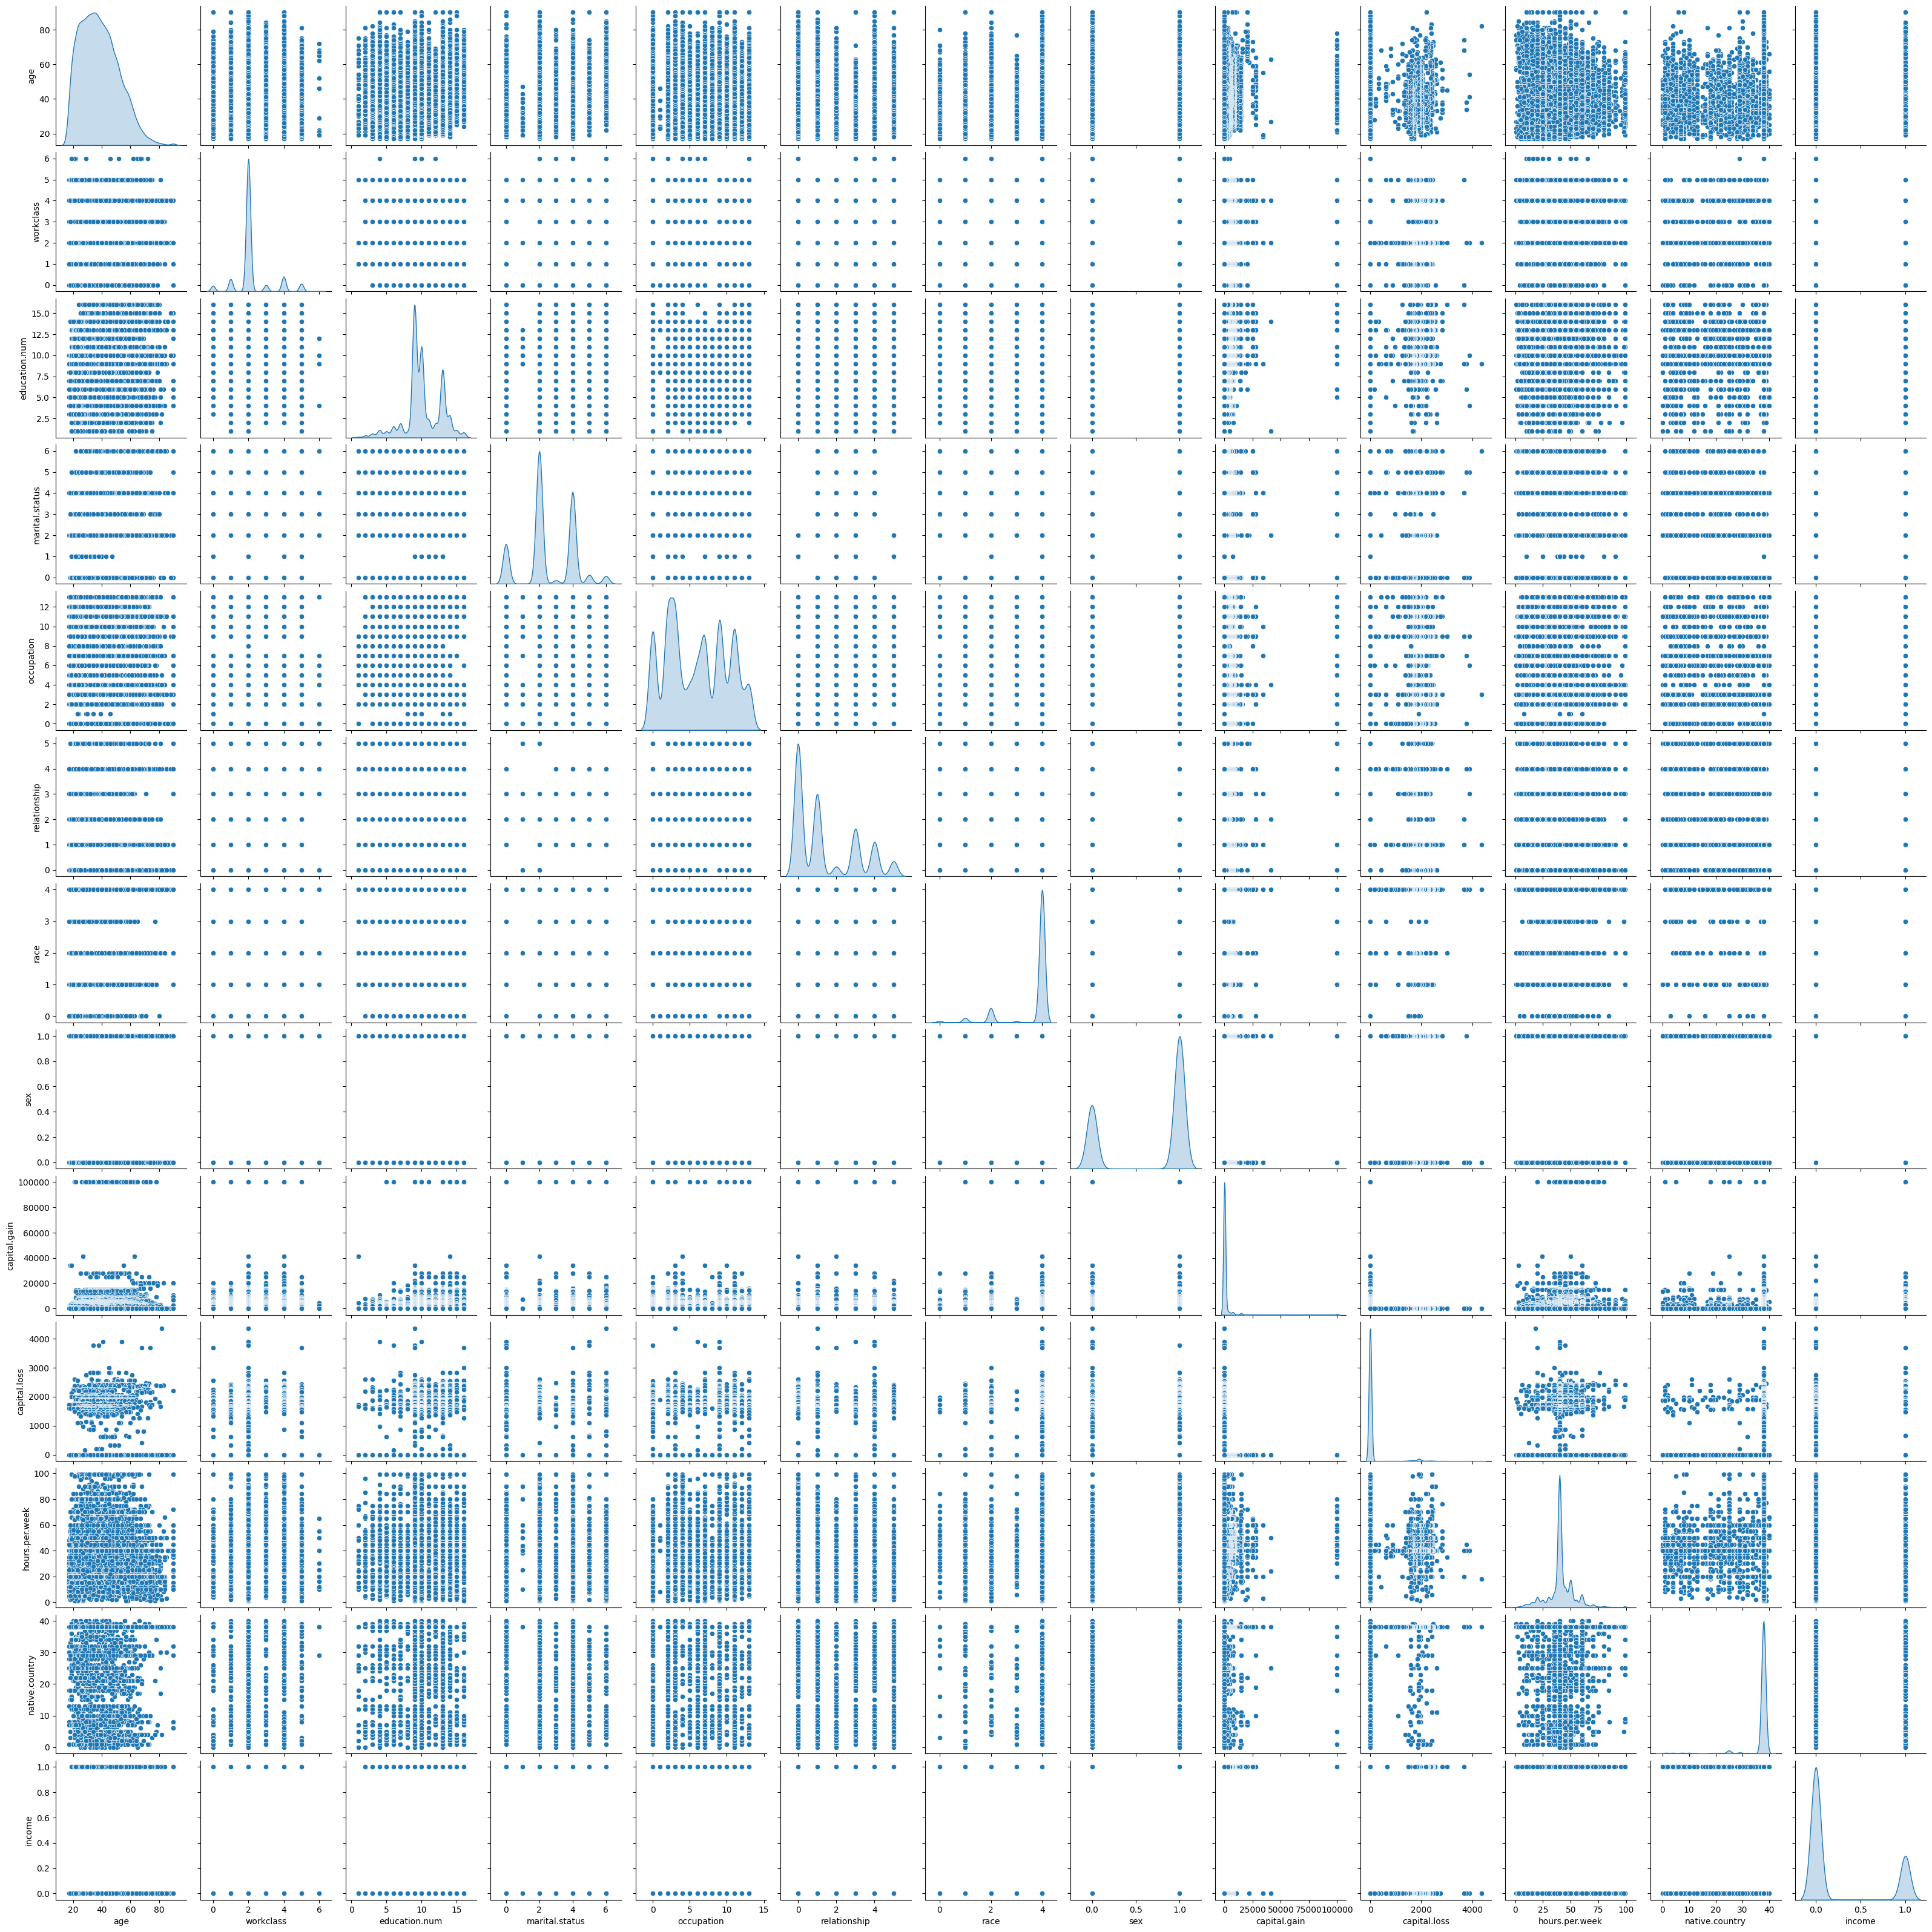

In [30]:
sns.pairplot(df_encoded, diag_kind="kde")
plt.show()